# BigMart - DecisionTree (Hyperparameter Tuning)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm, tqdm_notebook

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
df = pd.read_csv('final_train.csv')

In [60]:
# LEt's seggregate the target and independent variables first
X = df.drop(columns= 'Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

# Let's scale the independent variables and store them in a dataframe
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
x = pd.DataFrame(X_scaled, columns= X.columns)

# merge the independent and target variables to create a new dataframe with scaled features
scaled_df= pd.concat([x,Y], axis=1)
scaled_df.head(2)

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight_y,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,-0.737887,-0.970891,1.763875,0.133879,0.285343,-1.365170,-0.768435,-0.28777,-0.174363,-0.114158,...,-0.344522,-0.350919,-0.35007,-0.350495,2.847938,-0.382818,0.723256,-0.350707,-0.344522,3735.1380
1,1.355222,-0.908348,-1.486518,1.331598,0.285343,1.095912,-1.496059,-0.28777,-0.174363,-0.114158,...,-0.344522,-0.350919,-0.35007,-0.350495,-0.351131,-0.382818,-1.382637,2.851384,-0.344522,443.4228


We will tune the following hyperparamters in the DecisionTreeRegressor:
* max_depth
* min_samples_split
* min_samples_leaf

### 1. max_depth

In [61]:
def depth_score(data, min_r=1, max_r=10):
    
    X = data.drop(columns = 'Item_Outlet_Sales', axis= 1)
    Y = data['Item_Outlet_Sales']
    
    KF = KFold(n_splits= 5, shuffle= True, random_state= 0)
    
    results= []
    
    for depth in tqdm_notebook(range(min_r, max_r, 1), desc="Processing", leave=True):
        x = {}
        train_score = []
        val_score = []
        
        for i, (train_index, val_index) in enumerate(KF.split(X, Y)):
            xtr, xval = X.iloc[train_index], X.iloc[val_index]
            ytr, yval = Y.iloc[train_index], Y.iloc[val_index]
        
            model= DecisionTreeRegressor(random_state= 0, 
                                     max_depth= depth,
                                     min_samples_split= 5,
                                     min_samples_leaf= 5)
    
            model.fit(xtr, ytr)

            train_preds = model.predict(xtr)
            val_preds = model.predict(xval)

            train_rmse = np.sqrt(mse(ytr, train_preds))
            val_rmse = np.sqrt(mse(yval, val_preds))

            train_score.append(train_rmse)
            val_score.append(val_rmse)
            
            
        mean_score_train = np.mean(train_score)
        mean_score_valid = np.mean(val_score)

        print('With max_depth:\t' + str(depth) + '\tMean_RMSLE_Train:\t' + str(mean_score_train) + '\tMean_RMSLE_Valid:\t' + str(mean_score_valid))
                 
        x['depth'] = depth
        x['train'] = mean_score_train
        x['valid'] = mean_score_valid
    
        results.append(x)
        
    return pd.DataFrame(results)

In [62]:
depth_results = depth_score(scaled_df, min_r= 1, max_r= 25)

Processing:   0%|          | 0/24 [00:00<?, ?it/s]

With max_depth:	1	Mean_RMSLE_Train:	1416.0279493108453	Mean_RMSLE_Valid:	1416.9109081158633
With max_depth:	2	Mean_RMSLE_Train:	1207.1803299275532	Mean_RMSLE_Valid:	1210.2905755128106
With max_depth:	3	Mean_RMSLE_Train:	1117.5097672564123	Mean_RMSLE_Valid:	1120.2367120492036
With max_depth:	4	Mean_RMSLE_Train:	1049.3038562663417	Mean_RMSLE_Valid:	1056.261521283564
With max_depth:	5	Mean_RMSLE_Train:	1024.928967379469	Mean_RMSLE_Valid:	1044.1598115989168
With max_depth:	6	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With max_depth:	7	Mean_RMSLE_Train:	996.6388920803817	Mean_RMSLE_Valid:	1052.3322132395037
With max_depth:	8	Mean_RMSLE_Train:	978.0926822178374	Mean_RMSLE_Valid:	1068.7986795709035
With max_depth:	9	Mean_RMSLE_Train:	957.9335599699531	Mean_RMSLE_Valid:	1088.3776337349962
With max_depth:	10	Mean_RMSLE_Train:	934.5921183429884	Mean_RMSLE_Valid:	1104.678516996484
With max_depth:	11	Mean_RMSLE_Train:	910.1092546634445	Mean_RMSLE_Valid:	1127.58772264

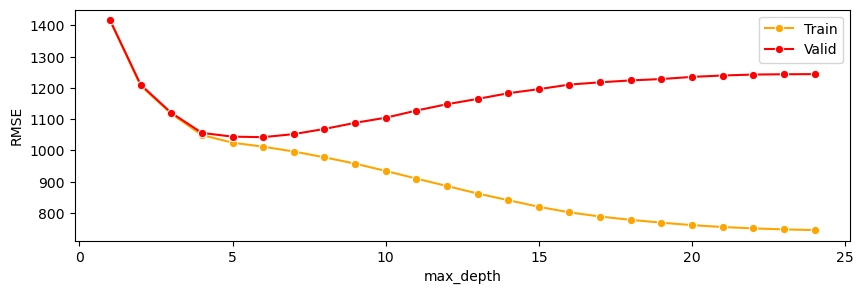

In [63]:
plt.figure(figsize= (10,3), dpi= 100)
sns.lineplot(x= depth_results['depth'], y= depth_results['train'], color = 'orange', marker= 'o', label= 'Train')
sns.lineplot(x= depth_results['depth'], y= depth_results['valid'], color = 'red', marker= 'o', label= 'Valid')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

We can see after **max_depth = 6, (RMSE= 1042)** the RMSE on validation is increasing and the training model has started over fitting.

### 2. min_samples_split

In [64]:
def min_split_score(data, min_r=1, max_r=10):
    
    X = data.drop(columns = 'Item_Outlet_Sales', axis= 1)
    Y = data['Item_Outlet_Sales']
    
    KF = KFold(n_splits= 5, shuffle= True, random_state= 0)
    
    results= []
    
    for splits in tqdm_notebook(range(min_r, max_r, 1), desc="Processing", leave=True):
        x = {}
        train_score = []
        val_score = []
        
        for i, (train_index, val_index) in enumerate(KF.split(X, Y)):
            xtr, xval = X.iloc[train_index], X.iloc[val_index]
            ytr, yval = Y.iloc[train_index], Y.iloc[val_index]
        
            model= DecisionTreeRegressor(random_state= 0, 
                                     max_depth= 6,
                                     min_samples_split= splits,
                                     min_samples_leaf= 5)
    
            model.fit(xtr, ytr)

            train_preds = model.predict(xtr)
            val_preds = model.predict(xval)

            train_rmse = np.sqrt(mse(ytr, train_preds))
            val_rmse = np.sqrt(mse(yval, val_preds))

            train_score.append(train_rmse)
            val_score.append(val_rmse)
            
            
        mean_score_train = np.mean(train_score)
        mean_score_valid = np.mean(val_score)

        print('With min_samples_split:\t' + str(splits) + '\tMean_RMSLE_Train:\t' + str(mean_score_train) + '\tMean_RMSLE_Valid:\t' + str(mean_score_valid))
                 
        x['min_split'] = splits
        x['train'] = mean_score_train
        x['valid'] = mean_score_valid
    
        results.append(x)
        
    return pd.DataFrame(results)

In [65]:
split_results= min_split_score(scaled_df, min_r= 1, max_r= 25)

Processing:   0%|          | 0/24 [00:00<?, ?it/s]

With min_samples_split:	1	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	2	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	3	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	4	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	5	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	6	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	7	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	8	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	9	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916
With min_samples_split:	10	Mean_RMSLE_Train:	1012.0160268957186	Mean_RMSLE_Valid:	1042.5962567774916

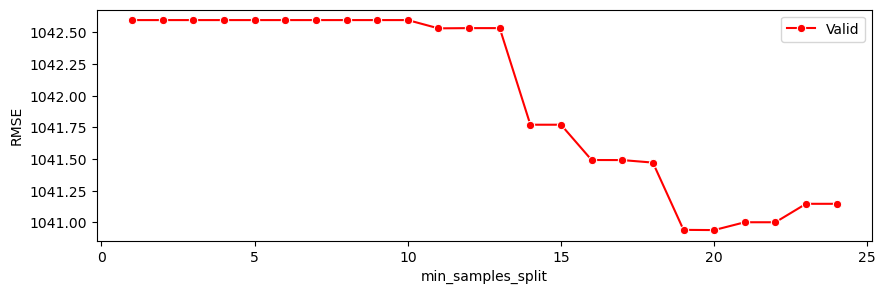

In [66]:
plt.figure(figsize= (10,3), dpi= 100)
#sns.lineplot(x= split_results['min_split'], y= split_results['train'], color = 'orange', marker= 'o', label= 'Train')
sns.lineplot(x= split_results['min_split'], y= split_results['valid'], color = 'red', marker= 'o', label= 'Valid')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.legend()
plt.show()

At **min_samples_split = 20 (RMSE = 1040.93)** the valid RMSE is lowest.

### 3. min_samples_leaf

In [67]:
def min_leaf_score(data, min_r=1, max_r=10):
    
    X = data.drop(columns = 'Item_Outlet_Sales', axis= 1)
    Y = data['Item_Outlet_Sales']
    
    KF = KFold(n_splits= 5, shuffle= True, random_state= 0)
    
    results= []
    
    for leaf in tqdm_notebook(range(min_r, max_r, 1), desc="Processing", leave=True):
        x = {}
        train_score = []
        val_score = []
        
        for i, (train_index, val_index) in enumerate(KF.split(X, Y)):
            xtr, xval = X.iloc[train_index], X.iloc[val_index]
            ytr, yval = Y.iloc[train_index], Y.iloc[val_index]
        
            model= DecisionTreeRegressor(random_state= 0, 
                                     max_depth= 6,
                                     min_samples_split= 20,
                                     min_samples_leaf= leaf)
    
            model.fit(xtr, ytr)

            train_preds = model.predict(xtr)
            val_preds = model.predict(xval)

            train_rmse = np.sqrt(mse(ytr, train_preds))
            val_rmse = np.sqrt(mse(yval, val_preds))

            train_score.append(train_rmse)
            val_score.append(val_rmse)
            
            
        mean_score_train = np.mean(train_score)
        mean_score_valid = np.mean(val_score)

        print('With min_samples_leaf:\t' + str(leaf) + '\tMean_RMSLE_Train:\t' + str(mean_score_train) + '\tMean_RMSLE_Valid:\t' + str(mean_score_valid))
                 
        x['min_leaf'] = leaf
        x['train'] = mean_score_train
        x['valid'] = mean_score_valid
    
        results.append(x)
        
    return pd.DataFrame(results)

In [68]:
leaf_results = min_leaf_score(scaled_df, min_r= 1, max_r= 100)

Processing:   0%|          | 0/99 [00:00<?, ?it/s]

With min_samples_leaf:	1	Mean_RMSLE_Train:	1012.4661272423916	Mean_RMSLE_Valid:	1045.1447385448384
With min_samples_leaf:	2	Mean_RMSLE_Train:	1012.5008151511007	Mean_RMSLE_Valid:	1044.9606498160651
With min_samples_leaf:	3	Mean_RMSLE_Train:	1012.7388741843637	Mean_RMSLE_Valid:	1042.3079998285841
With min_samples_leaf:	4	Mean_RMSLE_Train:	1012.68214717996	Mean_RMSLE_Valid:	1041.6454290283714
With min_samples_leaf:	5	Mean_RMSLE_Train:	1012.6961401440752	Mean_RMSLE_Valid:	1040.9388368351129
With min_samples_leaf:	6	Mean_RMSLE_Train:	1012.8740442374517	Mean_RMSLE_Valid:	1041.0127968712416
With min_samples_leaf:	7	Mean_RMSLE_Train:	1012.9043813816494	Mean_RMSLE_Valid:	1040.7505426345847
With min_samples_leaf:	8	Mean_RMSLE_Train:	1012.9612007596832	Mean_RMSLE_Valid:	1040.304696187436
With min_samples_leaf:	9	Mean_RMSLE_Train:	1013.0945078548259	Mean_RMSLE_Valid:	1040.6688850448672
With min_samples_leaf:	10	Mean_RMSLE_Train:	1013.2001959915664	Mean_RMSLE_Valid:	1040.4560452254632
With min_sam

With min_samples_leaf:	85	Mean_RMSLE_Train:	1022.2009668446244	Mean_RMSLE_Valid:	1037.4719007158046
With min_samples_leaf:	86	Mean_RMSLE_Train:	1022.2011135455899	Mean_RMSLE_Valid:	1037.4717929529859
With min_samples_leaf:	87	Mean_RMSLE_Train:	1022.2112457293613	Mean_RMSLE_Valid:	1037.6505866446041
With min_samples_leaf:	88	Mean_RMSLE_Train:	1022.3777821492349	Mean_RMSLE_Valid:	1038.3983068872417
With min_samples_leaf:	89	Mean_RMSLE_Train:	1022.3928998228788	Mean_RMSLE_Valid:	1038.5388720074443
With min_samples_leaf:	90	Mean_RMSLE_Train:	1022.6009192623917	Mean_RMSLE_Valid:	1039.0665107608818
With min_samples_leaf:	91	Mean_RMSLE_Train:	1022.6478061182139	Mean_RMSLE_Valid:	1039.001591405006
With min_samples_leaf:	92	Mean_RMSLE_Train:	1022.6586365767868	Mean_RMSLE_Valid:	1039.1916021050681
With min_samples_leaf:	93	Mean_RMSLE_Train:	1022.6985854778059	Mean_RMSLE_Valid:	1039.1007200897643
With min_samples_leaf:	94	Mean_RMSLE_Train:	1022.7073543563677	Mean_RMSLE_Valid:	1039.0962581674235
W

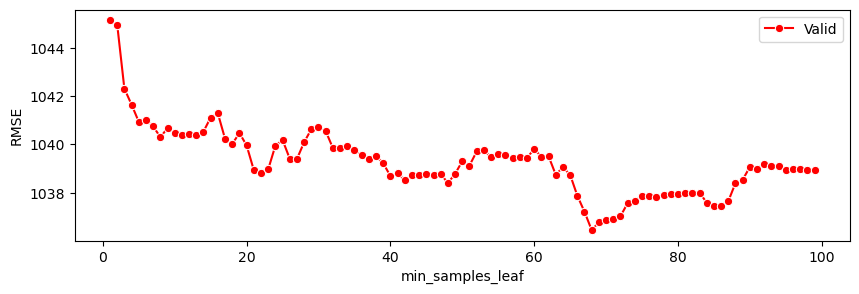

In [69]:
plt.figure(figsize= (10,3), dpi= 100)
#sns.lineplot(x= leaf_results['min_leaf'], y= leaf_results['train'], color = 'orange', marker= 'o', label= 'Train')
sns.lineplot(x= leaf_results['min_leaf'], y= leaf_results['valid'], color = 'red', marker= 'o', label= 'Valid')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.legend()
plt.show()

At **min_samples_leaf = 67**, the RMSE on validation is lowest **(RMSE= 1037.21)**

these are the final hyperparameters for DecisionTreeRegressor:
* **max_depth = 6**
* **min_samples_split = 20**
* **min_samples_leaf = 67**